In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("CustomerCardScore.csv")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_83847/2969308060.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CustomerCardScore.csv")


In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.shape

(100000, 28)

In [5]:
missing_data = df.isnull().sum()
print(missing_data)
#We checked your missing data

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [6]:
df = df.T.drop_duplicates().T

In [7]:
df=df.dropna()
#We dropped our missing data

In [8]:
df.describe().T

,count,unique,top,freq
ID,53049,53049,0x1602,1
Customer_ID,53049,11071,CUS_0x533b,8
Month,53049,8,January,6744
Name,53049,9168,Stevex,30
Age,53049,1057,38,1567
SSN,53049,11064,#F%$D@*&8,2971
Occupation,53049,16,_______,3727
Annual_Income,53049,14707,20867.67,11
Monthly_Inhand_Salary,53049.0,11628.0,6358.956667,12.0
Num_Bank_Accounts,53049,570,6,7401


In [9]:
df.drop(["ID", "Customer_ID", "Name", "SSN", "Month", "Type_of_Loan"], axis=1, inplace=True)
#We have only 8 months in our data set
#Type of loan is not neccessry
#Social Security number=SNN

In [10]:
print(df.dtypes)

Age                         object
Occupation                  object
Annual_Income               object
Monthly_Inhand_Salary       object
Num_Bank_Accounts           object
Num_Credit_Card             object
Interest_Rate               object
Num_of_Loan                 object
Delay_from_due_date         object
Num_of_Delayed_Payment      object
Changed_Credit_Limit        object
Num_Credit_Inquiries        object
Credit_Mix                  object
Outstanding_Debt            object
Credit_Utilization_Ratio    object
Credit_History_Age          object
Payment_of_Min_Amount       object
Total_EMI_per_month         object
Amount_invested_monthly     object
Payment_Behaviour           object
Monthly_Balance             object
Credit_Score                object
dtype: object


In [11]:
#objects
for i in df.columns:
    if df[i].dtype == type(object):
        print(i,end=': ')
        print('\n',df[i].unique())
        print()

Age: 
 ['23' '28_' '28' ... '8425' '2263' '1342']

Occupation: 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer'
 'Accountant' 'Architect' 'Musician' 'Developer']

Annual_Income: 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

Monthly_Inhand_Salary: 
 [1824.8433333333328 3037.986666666666 12187.22 ... 3097.008333333333
 1929.906666666667 3359.415833333333]

Num_Bank_Accounts: 
 [3 2 1 0 8 5 6 7 9 10 4 67 528 1647 1696 649 889 1620 1388 1429 1777 1096
 803 494 1414 831 121 823 1356 1651 711 210 1671 648 672 1662 1495 666 429
 980 718 1312 501 628 1016 1265 791 427 1036 619 555 1769 280 752 812 1487
 1019 1222 610 1714 525 797 1577 521 703 933 959 809 1089 1668 1789 434
 1295 677 120 698 1101 464 1462 45 244 1266 897 484 331 826 1026 549 473
 1628 371 445 1168 868 687 1003 598 351 1342 1557 373 942 386 1448 1332
 1033 1731 1214 1481 347 148 1467 1114 1000 632 689 482 1303

In [12]:
#In our data set, we have data was entered incorrectly, 
#we have missing data,
#and these are assigned as objects regardless of the category. 
#We will fix these problems.
#We will bring our data set into a numeric structure. We will make the incorrectly entered data suitable for our data set. 
#We will make adjustments to data that is not possible to be accurate.

In [13]:
#We start with incorrect entries in the age factor in our data set.
df['age-'] = df['Age'].str.replace('_', '')
df.drop('Age', axis=1, inplace=True)

In [14]:
#We convert it to integer type
df['age'] = df['age-'].astype(int, errors='ignore')

In [15]:
df.drop('age-', axis=1, inplace=True)

In [16]:
#We set a limit for data that is not possible to be accurate.
df=df[(df['age'] <= 90) & (df['age'] >= 19)]

In [17]:
df['age'].unique()

array([23, 28, 34, 54, 55, 33, 30, 24, 44, 45, 40, 32, 35, 36, 39, 37, 31,
       46, 41, 42, 48, 38, 43, 21, 22, 19, 20, 27, 26, 47, 25, 29, 49, 51,
       50, 52, 53, 56])

In [18]:
df["Credit_History_Age"].value_counts()

Credit_History_Age
18 Years and 2 Months     229
18 Years and 4 Months     229
19 Years and 5 Months     227
15 Years and 11 Months    225
18 Years and 11 Months    225
                         ... 
0 Years and 4 Months       16
33 Years and 8 Months       9
33 Years and 7 Months       9
0 Years and 3 Months        9
0 Years and 2 Months        8
Name: count, Length: 403, dtype: int64

In [19]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)
#Our year and month values ​​have been entered as objects, we will start by converting them to string expression.

In [20]:
df['year'] = df['Credit_History_Age'].str[:2]
#We take the year value and add it to our column named year.

In [21]:
df['year'].value_counts()
#We take the year value and add it to our column named year.

year
18    2465
19    2411
17    2360
16    2243
15    1923
20    1737
6     1694
13    1670
12    1547
11    1517
24    1478
30    1476
28    1456
29    1435
10    1410
9     1404
32    1403
7     1392
23    1392
31    1391
8     1374
22    1353
21    1341
26    1340
14    1314
25    1248
27    1232
5     1078
33     572
2      543
1      532
3      442
4      421
0      252
Name: count, dtype: int64

In [22]:
df['month'] = df['Credit_History_Age'].str[-9:-7]

In [23]:
df['month'].value_counts()
#We take the month values ​​and add them to the month column

month
10    4190
11    4128
 5    4100
 9    4076
 2    4076
 4    4073
 3    4070
 8    4043
 0    3562
 1    3542
 6    3538
 7    3448
Name: count, dtype: int64

In [24]:
#We convert our strings into numeric expressions.
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])

In [25]:
#We convert these into monthly totals.
df['Credit_History_Age_total'] = df['year'] + df['month']*12

In [26]:
df.drop(["year", "month", "Credit_History_Age"], axis=1, inplace=True)

In [27]:
#We continue with the data entered incorrectly in the data set. We apply these procedures to our other staff in line with the findings.

In [28]:
df["Occupation"].value_counts()

Occupation
_______          3291
Lawyer           3165
Mechanic         3031
Doctor           2976
Architect        2937
Accountant       2932
Entrepreneur     2927
Media_Manager    2925
Scientist        2903
Developer        2884
Teacher          2881
Engineer         2878
Writer           2810
Musician         2810
Journalist       2786
Manager          2710
Name: count, dtype: int64

In [29]:
df["Occupation"] = df["Occupation"].replace("_______", np.nan)
df["Occupation"].value_counts()

Occupation
Lawyer           3165
Mechanic         3031
Doctor           2976
Architect        2937
Accountant       2932
Entrepreneur     2927
Media_Manager    2925
Scientist        2903
Developer        2884
Teacher          2881
Engineer         2878
Writer           2810
Musician         2810
Journalist       2786
Manager          2710
Name: count, dtype: int64

In [30]:
df=df.dropna()

In [31]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    23287
No     15072
NM      5196
Name: count, dtype: int64

In [32]:
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("Yes",3)
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("No",1)
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM",2)
#We determine our numerical data.

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_83847/2738078668.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM",2)


In [33]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      11036
High_spent_Medium_value_payments     7786
Low_spent_Medium_value_payments      5997
High_spent_Large_value_payments      5954
High_spent_Small_value_payments      4999
Low_spent_Large_value_payments       4588
!@9#%8                               3195
Name: count, dtype: int64

In [34]:
#some catherogical data =Payment_Behaviour,Payment_of_Min_Amount,credit mix

In [35]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", np.nan)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("Low_spent_Small_value_payments", 1)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("Low_spent_Medium_value_payments", 2)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("Low_spent_Large_value_payments", 3)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("High_spent_Small_value_payments", 4)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("High_spent_Medium_value_payments", 5)
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("High_spent_Large_value_payments", 6)

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_83847/780327637.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("High_spent_Large_value_payments", 6)


In [36]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
1.0    11036
5.0     7786
2.0     5997
6.0     5954
4.0     4999
3.0     4588
Name: count, dtype: int64

In [37]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

In [38]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype("float")

In [39]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
df['Monthly_Balance'] = df['Monthly_Balance'].astype("float")

In [40]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(str)

In [41]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].replace('_', np.nan,regex=True)
df["Outstanding_Debt"] = df["Outstanding_Debt"].replace('-', np.nan,regex=True)
df["Outstanding_Debt"] = df["Outstanding_Debt"].replace('__', np.nan,regex=True)


In [42]:
df["Outstanding_Debt"].value_counts()

Outstanding_Debt
1151.7     16
1344.45    14
883.26     13
380.09     13
1109.03    13
           ..
915.14      1
789.89      1
13.59       1
643.23      1
1125.03     1
Name: count, Length: 9957, dtype: int64

In [43]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype("float")

In [44]:
df["Annual_Income"] = df["Annual_Income"].replace('_', np.nan,regex=True)
df["Annual_Income"] = df["Annual_Income"].replace('-', np.nan,regex=True)
df["Annual_Income"] = df["Annual_Income"].replace('__', np.nan,regex=True)

In [45]:
df["Annual_Income"] = df["Annual_Income"].astype("float")

In [46]:
df["Num_of_Loan"].value_counts()
#Num_of_Loan: It is used to determine loan volume in a financial analysis.

Num_of_Loan
2      7275
3      7240
4      7063
1      5329
6      3364
       ... 
231       1
752       1
174       1
834       1
966       1
Name: count, Length: 207, dtype: int64

In [47]:
df["Num_of_Loan"] = df["Num_of_Loan"].replace('-', np.nan,regex=True)
df["Num_of_Loan"] = df["Num_of_Loan"].replace('_', np.nan,regex=True)
df=df.dropna()


In [48]:
df["Num_of_Loan"]=df["Num_of_Loan"].astype(int)

In [49]:
df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
19      1569
18      1497
16      1494
17      1484
10      1477
        ... 
4219       1
1531       1
1673       1
3489       1
2047       1
Name: count, Length: 283, dtype: int64

In [50]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].replace('-', np.nan,regex=True)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].replace('_', np.nan,regex=True)
df=df.dropna()

In [51]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(int)

In [52]:
df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
19      1569
18      1497
16      1494
17      1484
10      1477
        ... 
2860       1
4219       1
1531       1
1673       1
2047       1
Name: count, Length: 239, dtype: int64

In [53]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace("NaN", np.nan)

In [54]:
df["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
__10000__             1132
0.0                     51
325.45381727469345       1
47.94659150277275        1
519.4298544612193        1
                      ... 
187.99926219619488       1
93.74028159979368        1
1155.6697264631664       1
49.60951350040906        1
24.02847744864441        1
Name: count, Length: 24284, dtype: int64

In [55]:
df["Delay_from_due_date"] = df["Delay_from_due_date"].clip(lower=0)
#Since our value cannot be less than 0, we adjusted accordingly.

In [56]:
df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].astype(int)

In [57]:
#We can convert this ratio into simpler numbers, let's convert it to the nearest int value.

df["Credit_Utilization_Ratio"]=df["Credit_Utilization_Ratio"].astype(float)

In [58]:
#We can convert this ratio into simpler numbers, let's convert it to the nearest int value.

df["Credit_Utilization_Ratio"]=df["Credit_Utilization_Ratio"].round()

In [59]:
df["Credit_Utilization_Ratio"].value_counts()

Credit_Utilization_Ratio
32.0    1618
38.0    1563
37.0    1559
34.0    1541
33.0    1538
36.0    1514
35.0    1499
29.0    1486
31.0    1484
28.0    1472
30.0    1468
27.0    1414
26.0    1368
39.0    1315
25.0    1186
40.0     926
24.0     906
41.0     555
23.0     507
42.0     217
22.0     147
43.0      94
44.0      46
45.0      18
46.0      11
47.0       6
48.0       3
21.0       3
50.0       1
Name: count, dtype: int64

In [60]:
df["Credit_Utilization_Ratio"]=df["Credit_Utilization_Ratio"].astype(int)

In [61]:
df["Total_EMI_per_month"].value_counts()
#EMI:Designed to give you an accurate estimate of the monthly repayment portion they should make for their registered loan
#A loan EMI calculator allows borrowers to experiment with different loan amounts, 
#interest rates and tenors, helping them understand how these variables affect their monthly repayments.

Total_EMI_per_month
58.565808       8
349.099494      8
66.681222       7
38.773568       7
200.626613      7
               ..
93.510337       1
78484.000000    1
90.812205       1
73.563999       1
35.104023       1
Name: count, Length: 10675, dtype: int64

In [62]:
df["Total_EMI_per_month"] = df["Total_EMI_per_month"].astype("float")

In [63]:
df["Total_EMI_per_month"] = df["Total_EMI_per_month"].round(3)

In [64]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace('-', np.nan,regex=True)
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace('_', np.nan,regex=True)

In [65]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)

In [66]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].round(3)

In [67]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype(int)

In [68]:
df['Credit_Mix']=df['Credit_Mix'].replace("Standard",1)
df['Credit_Mix']=df['Credit_Mix'].replace("Bad",2)
df['Credit_Mix']=df['Credit_Mix'].replace("Good",3)
df['Credit_Mix']=df['Credit_Mix'].replace("-",np.nan)

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_83847/2929225653.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Credit_Mix']=df['Credit_Mix'].replace("Good",3)


In [69]:
df=df.dropna()

In [70]:
df["Num_Credit_Inquiries"] = pd.to_numeric(df["Num_Credit_Inquiries"], errors='coerce')

In [71]:
df["Credit_Score"]=df["Credit_Score"].replace("Poor",1)
df["Credit_Score"]=df["Credit_Score"].replace("Standard",2)
df["Credit_Score"]=df["Credit_Score"].replace("Good",3)

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_83847/1266344489.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Credit_Score"]=df["Credit_Score"].replace("Good",3)


In [72]:
df["Credit_Score"].astype(int)

9        3
12       3
13       3
15       3
21       3
        ..
99976    3
99977    3
99979    3
99991    2
99997    1
Name: Credit_Score, Length: 24333, dtype: int64

In [73]:
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')

In [74]:
df["Num_Credit_Card"] = pd.to_numeric(df["Num_Credit_Card"], errors='coerce')

In [75]:
df["Interest_Rate"] = pd.to_numeric(df["Interest_Rate"], errors='coerce')

In [76]:

df["Delay_from_due_date"] = pd.to_numeric(df["Delay_from_due_date"], errors='coerce')

In [77]:
df["Occupation"] = df["Occupation"].replace("Scientist", 1)
df["Occupation"] = df["Occupation"].replace("Teacher", 2)
df["Occupation"] = df["Occupation"].replace("Engineer", 3)
df["Occupation"] = df["Occupation"].replace("Entrepreneur", 4)
df["Occupation"] = df["Occupation"].replace("Lawyer", 5)
df["Occupation"] = df["Occupation"].replace("Media_Manager", 6)
df["Occupation"] = df["Occupation"].replace("Doctor", 7)
df["Occupation"] = df["Occupation"].replace("Journalist", 8)
df["Occupation"] = df["Occupation"].replace("Manager", 9)
df["Occupation"] = df["Occupation"].replace("Mechanic", 10)
df["Occupation"] = df["Occupation"].replace("Writer", 11)
df["Occupation"] = df["Occupation"].replace("Mechanic", 12)
df["Occupation"] = df["Occupation"].replace("Developer", 13)
df["Occupation"] = df["Occupation"].replace("Musician", 14)
df["Occupation"] = df["Occupation"].replace("Architect", 15)
df["Occupation"] = df["Occupation"].replace("Accountant", 16)





/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_83847/1933244374.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Occupation"] = df["Occupation"].replace("Accountant", 16)


In [78]:
df.dtypes

Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio      int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
age                           int64
Credit_History_Age_total      int64
dtype: object

In [79]:
import seaborn as sns

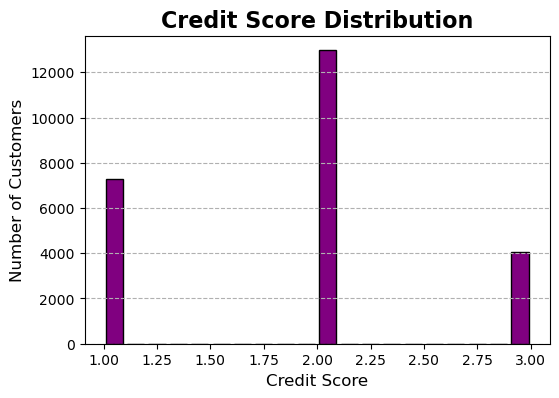

In [80]:
plt.figure(figsize=(6, 4))
plt.hist(df['Credit_Score'], bins=20, color='purple', edgecolor='black', rwidth=0.8)
plt.title('Credit Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

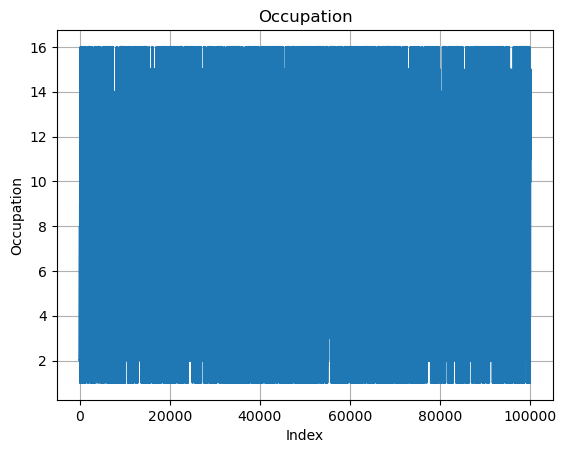

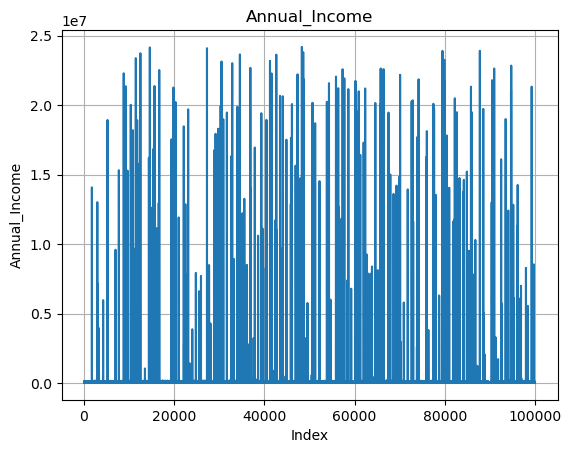

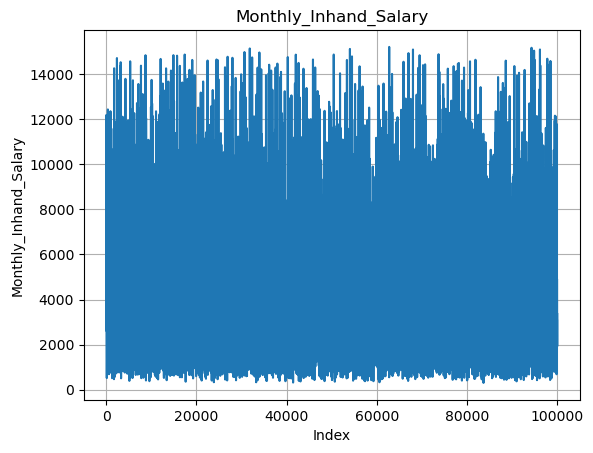

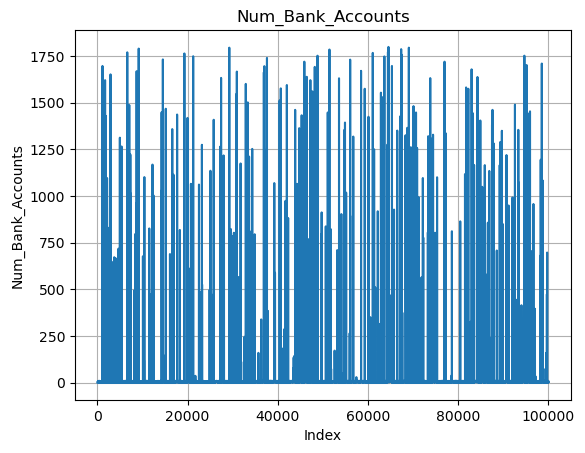

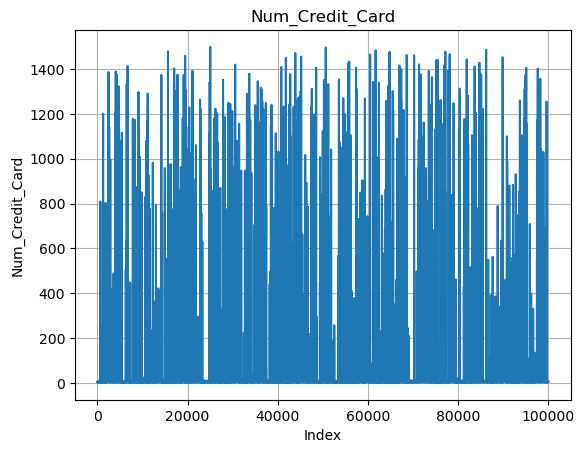

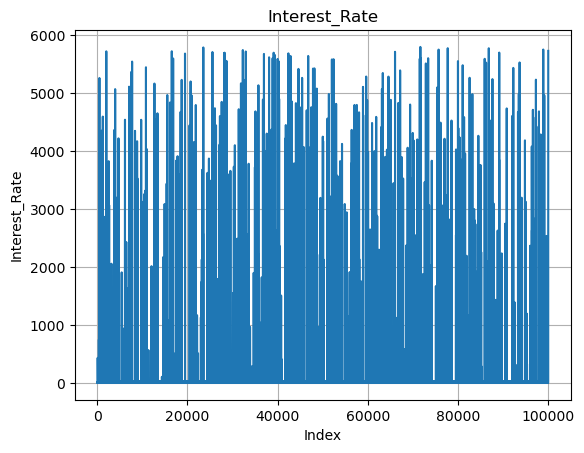

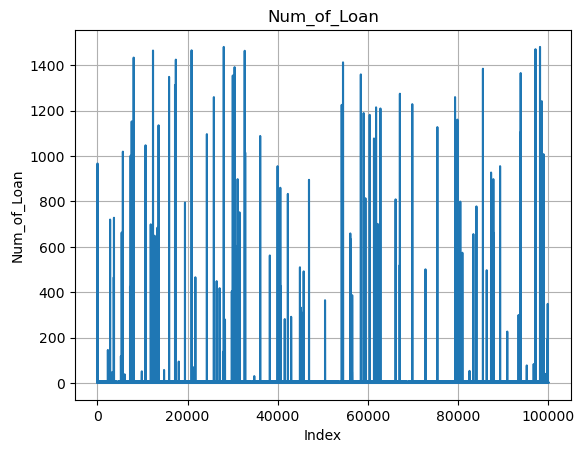

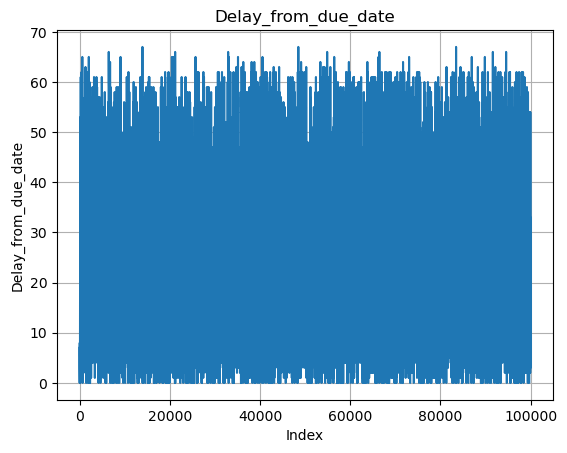

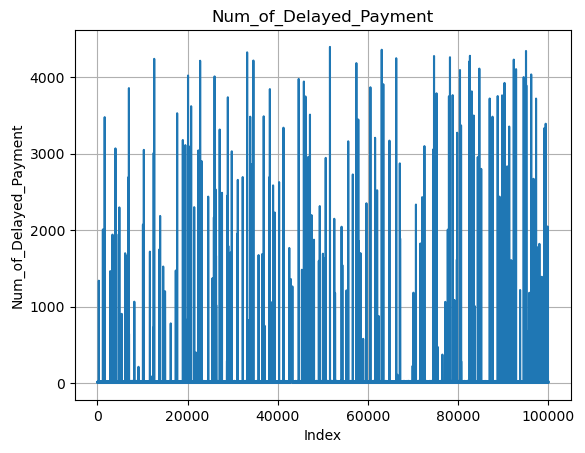

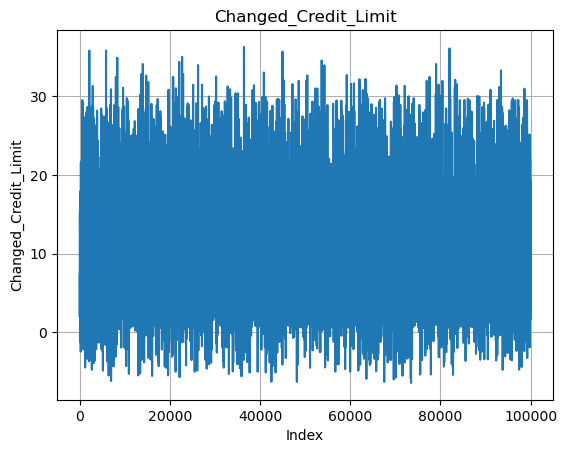

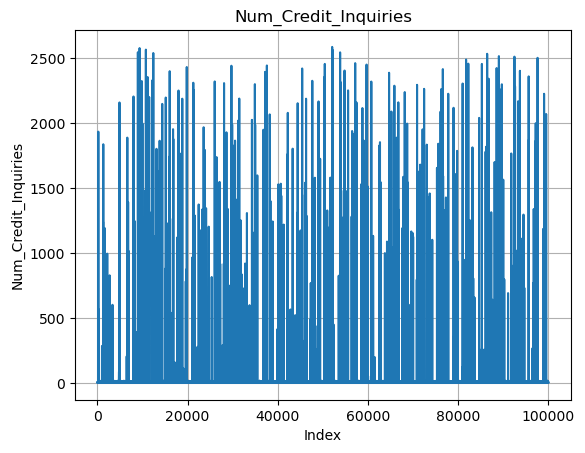

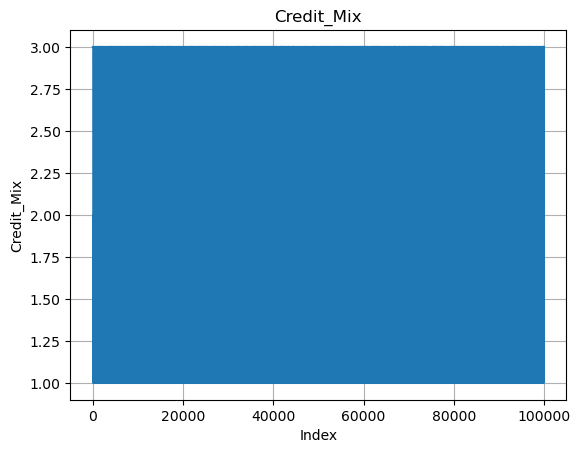

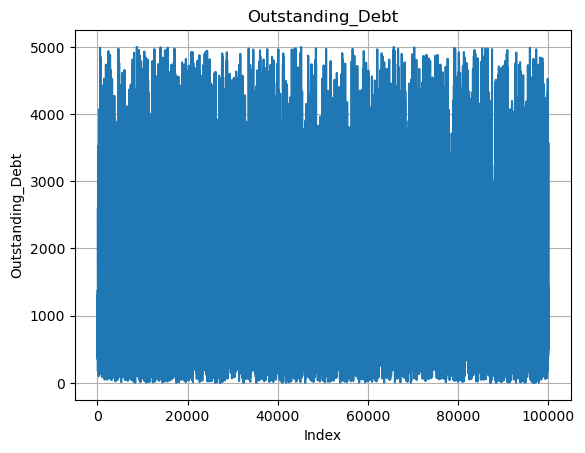

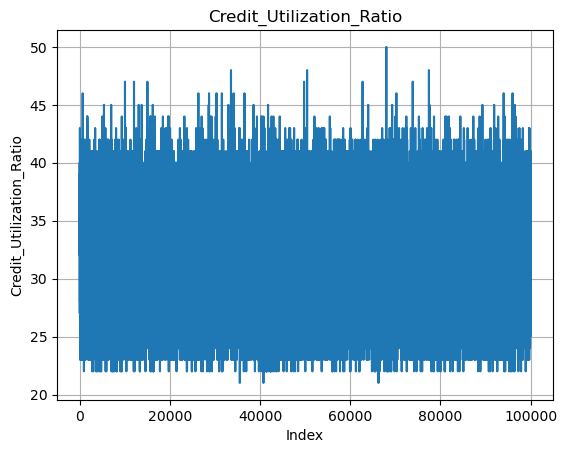

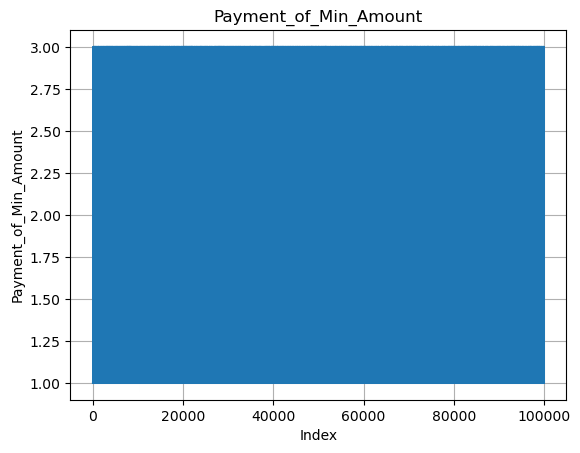

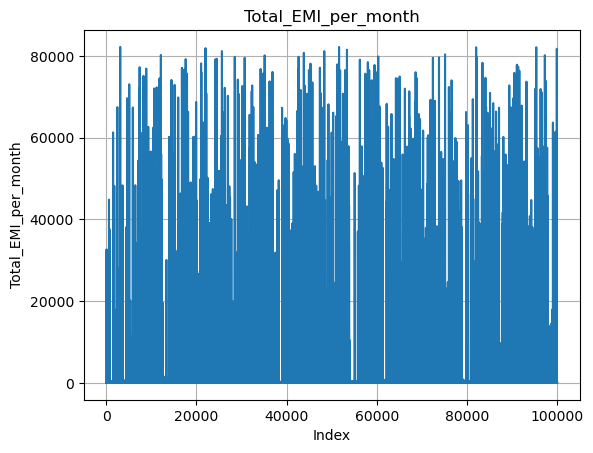

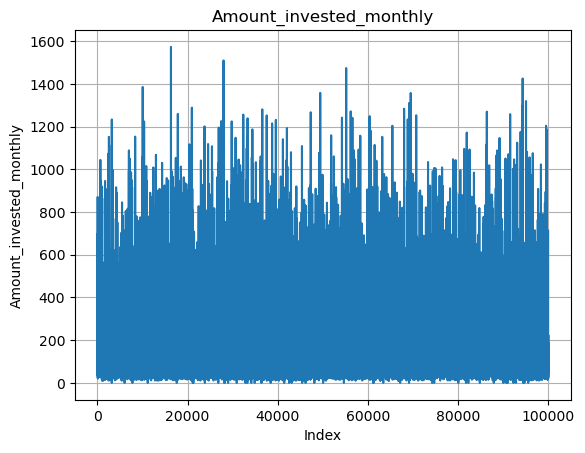

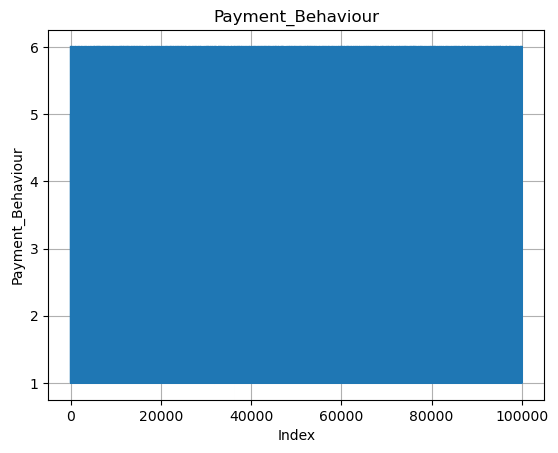

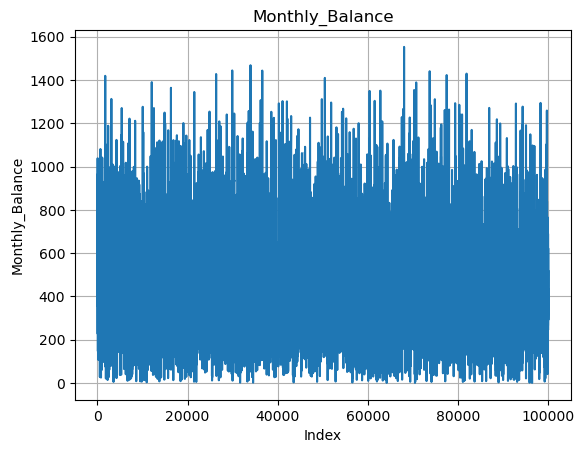

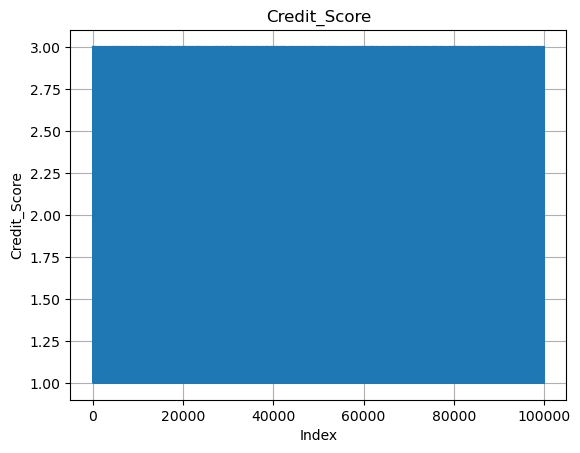

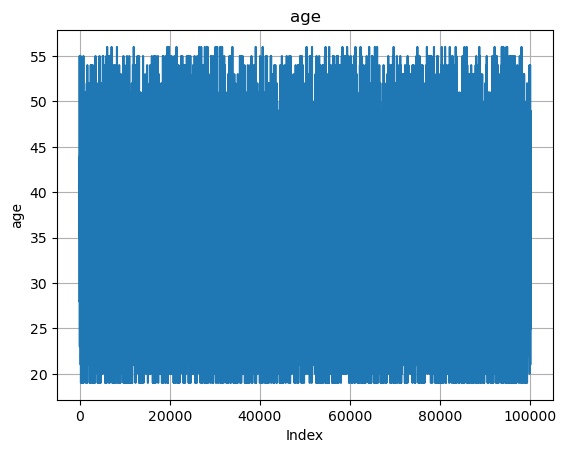

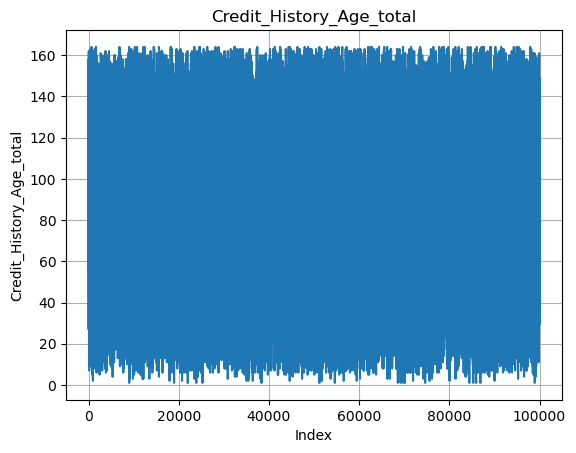

In [81]:
for column in df.select_dtypes(include=['number']):
    plt.figure()
    plt.plot(df[column])
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
X=df.drop('Credit_Score', axis=1)
y=df['Credit_Score']
#We prepare our data set for training.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [85]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#We use standardscaler because our data set is more scalable.

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
from sklearn.metrics import classification_report

# We create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.77      0.74      1460
           2       0.76      0.75      0.76      2595
           3       0.64      0.58      0.61       812

    accuracy                           0.73      4867
   macro avg       0.70      0.70      0.70      4867
weighted avg       0.73      0.73      0.73      4867



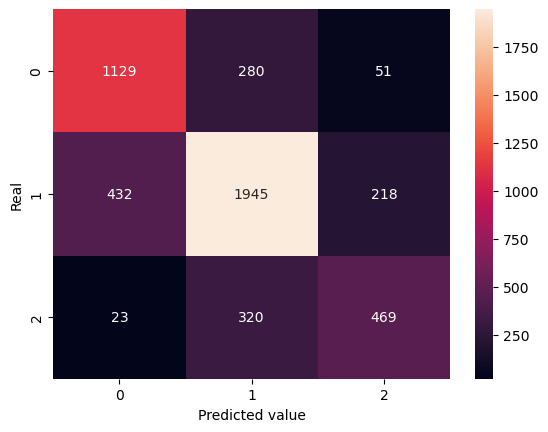

In [89]:
cm = confusion_matrix(y_test, y_pred)

# We visualize with heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Real')
plt.show()